In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
col_num=['age','avg_glucose_level', 'bmi']

### UNIVARIATE ANALYSIS

In [6]:
data[col_num].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [7]:
data[col_num].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


<AxesSubplot:>

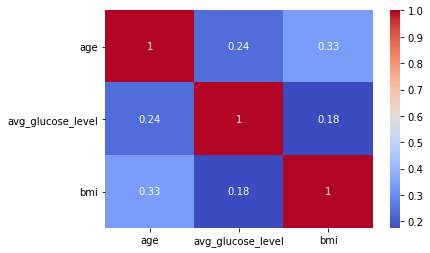

In [8]:
sns.heatmap(data[col_num].corr(),cmap='coolwarm',annot=True)

In [9]:
data.shape

(5110, 12)

In [10]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
col=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [12]:
col1=[ 'gender', 'hypertension', 'heart_disease', 
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']

In [13]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
data[col1].nunique()

gender            3
hypertension      2
heart_disease     2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
print(f'smoking_status:  {data.smoking_status.unique()}')
print(f'gender:  {data.gender.unique()}')
print(f'ever_married:  {data.ever_married.unique()}')
print(f'work_type:  {data.work_type.unique()}')
print(f'Residence_type:  {data.Residence_type.unique()}')

smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
gender:  ['Male' 'Female' 'Other']
ever_married:  ['Yes' 'No']
work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:  ['Urban' 'Rural']


### Data exploration

In [17]:
pd.DataFrame(data.gender.value_counts())

,gender
Female,2994
Male,2115
Other,1


In [18]:
pd.DataFrame(data.ever_married.value_counts())

,ever_married
Yes,3353
No,1757


In [19]:
pd.DataFrame(data.work_type.value_counts())

,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [20]:
pd.DataFrame(data.Residence_type.value_counts())

,Residence_type
Urban,2596
Rural,2514


Replacing missing value of bmi with median

In [21]:
data['bmi'].fillna(data['bmi'].median(),inplace =True)


In [22]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
data['smoking_status'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
pd.DataFrame(data.smoking_status.value_counts())

,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

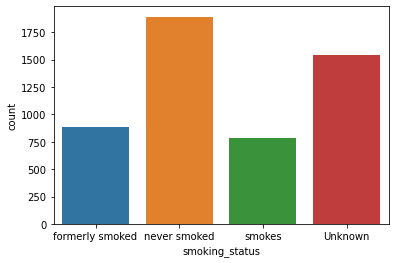

In [25]:
sns.countplot(data.smoking_status)

In [26]:
data['decile_rank_age']= pd.qcut(data['age'],10,labels=False)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decile_rank_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,8
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,7
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,9
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,9


In [27]:
data.groupby('decile_rank_age').stroke.value_counts(normalize=True).unstack() * 100

stroke,0,1
decile_rank_age,,
0,99.815838,0.184162
1,99.792531,0.207469
2,100.000000,NaN
3,99.432892,0.567108
4,98.458574,1.541426
5,96.895787,3.104213
6,94.970986,5.029014
7,92.844365,7.155635
8,88.000000,12.000000


Replacing Unknown values of smoking_status

In [28]:
data1=pd.crosstab(data[data.smoking_status!='Unknown'].decile_rank_age,data[data.smoking_status!='Unknown'].smoking_status,normalize='index')*100
data1

smoking_status,formerly smoked,never smoked,smokes
decile_rank_age,,,
0,22.727273,72.727273,4.545455
1,10.077519,79.069767,10.852713
2,15.313225,57.076566,27.610209
3,18.095238,55.238095,26.666667
4,20.098039,52.941176,26.960784
5,23.369565,50.271739,26.358696
6,26.463700,48.477752,25.058548
7,33.333333,44.519016,22.147651
8,37.889688,45.083933,17.026379


In [29]:
data1.style.background_gradient(cmap='coolwarm')

smoking_status,formerly smoked,never smoked,smokes
decile_rank_age,,,
0,22.727273,72.727273,4.545455
1,10.077519,79.069767,10.852713
2,15.313225,57.076566,27.610209
3,18.095238,55.238095,26.666667
4,20.098039,52.941176,26.960784
5,23.369565,50.271739,26.358696
6,26.463700,48.477752,25.058548
7,33.333333,44.519016,22.147651
8,37.889688,45.083933,17.026379


In [30]:
data["rep_smoking_status"] = np.where(data["smoking_status"] =="Unknown", np.where(data.decile_rank_age>=7,"formerly smoked",np.where(data.decile_rank_age>=2,"smokes","never smoked")),data["smoking_status"])

In [31]:
data.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decile_rank_age,rep_smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,8,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,7,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,9,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,9,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,9,formerly smoked
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,8,never smoked
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,8,never smoked
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,7,formerly smoked
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,9,formerly smoked


Checking Outlier

In [32]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [33]:
for i in col_num:
    outliers = find_outliers_IQR(data[i])
    print("No.of outliers in "+ i +": " +str(len(outliers)))

No.of outliers in age: 0
No.of outliers in avg_glucose_level: 627
No.of outliers in bmi: 126


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


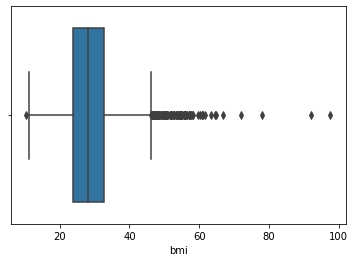

In [34]:
#plot the box plot  to highlight outlier
sns.boxplot(data.bmi);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


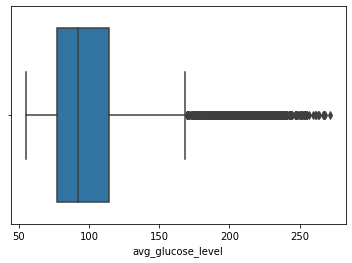

In [35]:
#plot the box plot  to highlight outlier
sns.boxplot(data.avg_glucose_level);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


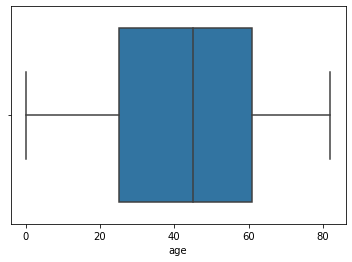

In [36]:
#plot the box plot  to highlight outlier
sns.boxplot(data.age);

### BIVARIATE ANALYSIS

In [37]:
bystroke=data.groupby("smoking_status").stroke.value_counts(normalize=True)*100
bystroke.unstack()

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


In [38]:
bystroke=data.groupby("gender").stroke.value_counts(normalize=True)*100
bystroke.unstack()

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,NaN


In [39]:
pd.crosstab(data.work_type,data.stroke,normalize='index')*100

stroke,0,1
work_type,,
Govt_job,94.977169,5.022831
Never_worked,100.000000,0.000000
Private,94.905983,5.094017
Self-employed,92.063492,7.936508
children,99.708879,0.291121


<AxesSubplot:xlabel='work_type'>

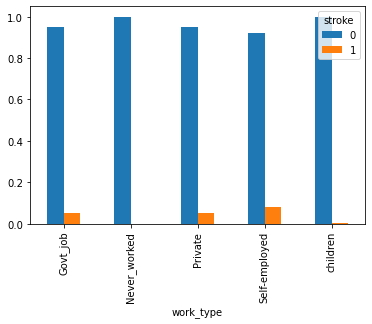

In [40]:
pd.crosstab(data.work_type,data.stroke,normalize='index').plot(kind='bar')

In [41]:
bystroke=data.groupby("work_type").stroke.value_counts(normalize=True)*100
bystroke.unstack()

stroke,0,1
work_type,,
Govt_job,94.977169,5.022831
Never_worked,100.000000,NaN
Private,94.905983,5.094017
Self-employed,92.063492,7.936508
children,99.708879,0.291121


In [42]:
pd.crosstab(data.Residence_type,data.stroke,normalize='index')*100

stroke,0,1
Residence_type,,
Rural,95.465394,4.534606
Urban,94.799692,5.200308


<AxesSubplot:xlabel='Residence_type'>

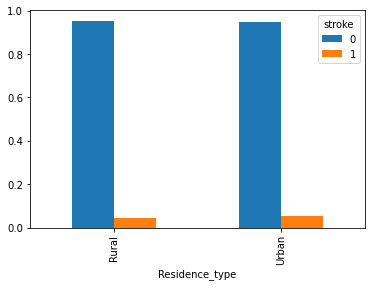

In [43]:
pd.crosstab(data.Residence_type,data.stroke,normalize='index').plot(kind='bar')

In [44]:
pd.crosstab(data.hypertension,data.stroke,normalize='index')*100

stroke,0,1
hypertension,,
0,96.032090,3.967910
1,86.746988,13.253012


In [45]:
bystroke=data.groupby("heart_disease").stroke.value_counts(normalize=True)*100
bystroke.unstack()

stroke,0,1
heart_disease,,
0,95.821266,4.178734
1,82.971014,17.028986


<AxesSubplot:xlabel='smoking_status', ylabel='decile_rank_age'>

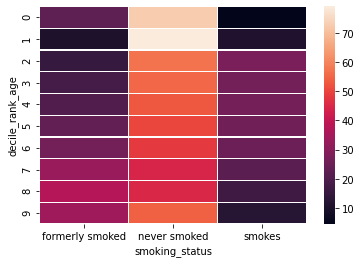

In [46]:
sns.heatmap(data1,linewidths=0.30)

Chi Square Test to dependency of two categorical variables

In [47]:
#H0-Work_type and stroke are independent
#H1-work _type and stroke are not independent
# create contingency table
data_crosstab = pd.crosstab(data.work_type,
                            data.stroke,
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = data.work_type.unique()
columns = data.stroke.unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 49.1635119766753  and p value is: 5.397707836252152e-10
Null Hypothesis is rejected.


In [48]:
from scipy.stats import chi2_contingency

In [49]:
def chi_test(feature1,feature2,alpha):
    df= pd.crosstab(data[feature1],data[feature2])
    stat, p, dof, expected = chi2_contingency(df)

# interpret p-value
    print("p value for "+ feature1+ " is: " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
        

In [50]:
for i in col1:
    if i=='stroke':
        continue
    chi_test(i,'stroke',0.05)
    print()

p value for gender is: 0.7895490538408245
Independent (H0 holds true)

p value for hypertension is: 1.661621901511823e-19
Dependent (reject H0)

p value for heart_disease is: 2.0887845685229236e-21
Dependent (reject H0)

p value for work_type is: 5.397707801896119e-10
Dependent (reject H0)

p value for Residence_type is: 0.29833169286876987
Independent (H0 holds true)

p value for smoking_status is: 2.0853997025008455e-06
Dependent (reject H0)



In [51]:
astroke=pd.crosstab(data.decile_rank_age,data.stroke,normalize='index')
astroke

stroke,0,1
decile_rank_age,,
0,0.998158,0.001842
1,0.997925,0.002075
2,1.000000,0.000000
3,0.994329,0.005671
4,0.984586,0.015414
5,0.968958,0.031042
6,0.949710,0.050290
7,0.928444,0.071556
8,0.880000,0.120000


Age_decile and stroke

<AxesSubplot:xlabel='decile_rank_age', ylabel='1'>

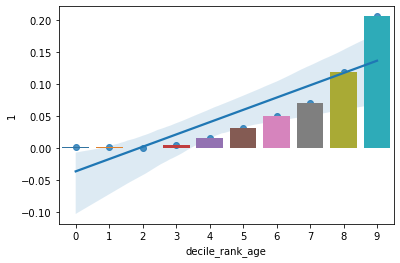

In [52]:
sns.regplot(x=astroke.index,y=astroke.iloc[:,1])
sns.barplot(x= astroke.index,y=astroke.iloc[:,1])

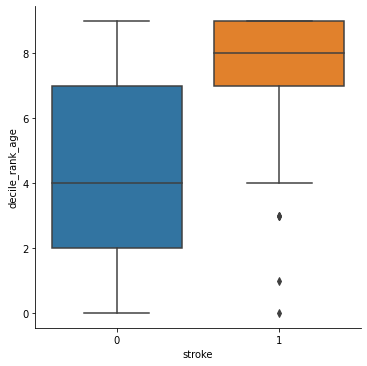

In [53]:
sns.catplot(data=data,x=data.stroke,y=data.decile_rank_age,kind='box')

Bmi_decile and stroke

In [54]:
data['bmi_decile']= pd.qcut(data['bmi'],10,labels=False)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decile_rank_age,rep_smoking_status,bmi_decile
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,8,formerly smoked,8
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,7,never smoked,4
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,9,never smoked,7
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5,smokes,8
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,9,never smoked,2


<AxesSubplot:xlabel='bmi_decile', ylabel='1'>

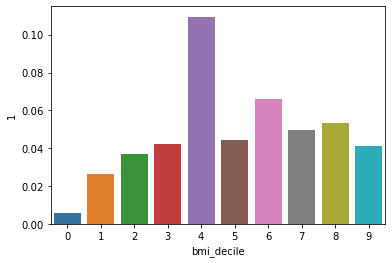

In [55]:
bmistroke=pd.crosstab(data.bmi_decile,data.stroke,normalize='index')
sns.barplot(x= bmistroke.index,y=bmistroke.iloc[:,1])

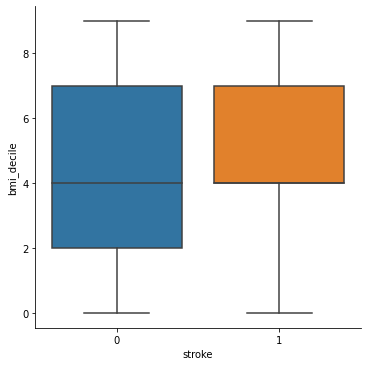

In [56]:
sns.catplot(data=data,x=data.stroke,y=data.bmi_decile,kind='box')

avg_glucose_level decile and stroke

In [57]:
data['agl_decile']= pd.qcut(data['avg_glucose_level'],10,labels=False)


<AxesSubplot:xlabel='agl_decile', ylabel='1'>

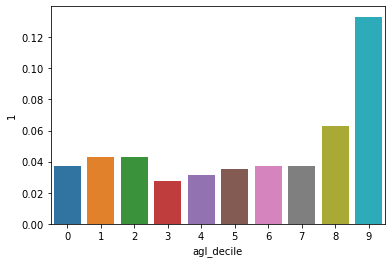

In [58]:
aglstroke=pd.crosstab(data.agl_decile,data.stroke,normalize='index')
sns.barplot(x= aglstroke.index,y=aglstroke.iloc[:,1])

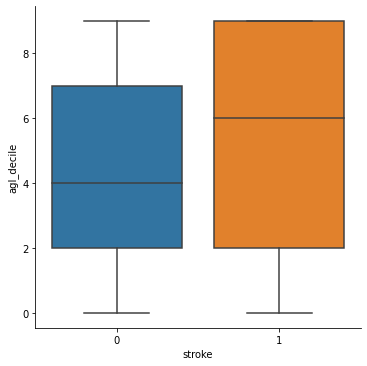

In [59]:
sns.catplot(data=data,x=data.stroke,y=data.agl_decile,kind='box')

In [60]:
matrix = data[col_num].corr()
print(matrix)

                        age  avg_glucose_level       bmi
age                1.000000           0.238171  0.324296
avg_glucose_level  0.238171           1.000000  0.166876
bmi                0.324296           0.166876  1.000000


<AxesSubplot:>

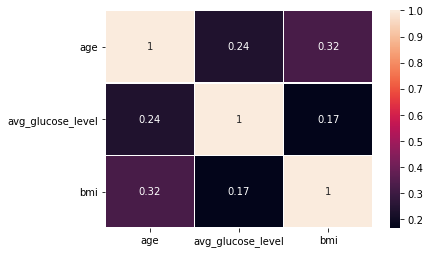

In [61]:
sns.heatmap(matrix,linewidths=0.30,annot=True)

class sklearn.preprocessing.OneHotEncoder

In [62]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'rep_smoking_status' column 
encoder_data = pd.DataFrame(encoder.fit_transform(data[['rep_smoking_status']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_data = data.join(encoder_data)

#view final df
final_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,decile_rank_age,rep_smoking_status,bmi_decile,agl_decile,0,1,2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,8,formerly smoked,8,9,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,7,never smoked,4,9,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,9,never smoked,7,6,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5,smokes,8,8,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,9,never smoked,2,8,0.0,1.0,0.0


One-Hot encoding the categorical parameters using get_dummies() 

In [63]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['rep_smoking_status', 'work_type','ever_married'])
one_hot_encoded_data.head()

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,...,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,rep_smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes
0,9046,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1,...,1,0,0,0,0,1,0,0,0,1
1,51676,Female,61.0,0,0,Rural,202.21,28.1,never smoked,1,...,0,1,0,0,0,0,1,0,0,1
2,31112,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1,...,0,1,0,0,0,1,0,0,0,1
3,60182,Female,49.0,0,0,Urban,171.23,34.4,smokes,1,...,0,0,1,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1,...,0,1,0,0,0,0,1,0,0,1


In [64]:
one_hot_encoded_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'decile_rank_age', 'bmi_decile', 'agl_decile',
       'rep_smoking_status_formerly smoked', 'rep_smoking_status_never smoked',
       'rep_smoking_status_smokes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'ever_married_No',
       'ever_married_Yes'],
      dtype='object')

In [65]:
data_f = one_hot_encoded_data[['age', 'hypertension','heart_disease','avg_glucose_level','rep_smoking_status_formerly smoked','rep_smoking_status_never smoked','work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 
       'ever_married_Yes','stroke']]

In [66]:
data_f.head()

,age,hypertension,heart_disease,avg_glucose_level,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,ever_married_Yes,stroke
0,67.0,0,1,228.69,1,0,0,0,1,0,1,1
1,61.0,0,0,202.21,0,1,0,0,0,1,1,1
2,80.0,0,1,105.92,0,1,0,0,1,0,1,1
3,49.0,0,0,171.23,0,0,0,0,1,0,1,1
4,79.0,1,0,174.12,0,1,0,0,0,1,1,1


In [67]:
from sklearn.model_selection import train_test_split
x = data_f.iloc[:,:-1].values
y = data_f.iloc[:,-1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

### Logistic model

In [68]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = data_f.iloc[:,:-1].values
y = data_f.iloc[:,-1].values

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C= 5, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=5, random_state=0, solver='liblinear')

In [69]:
import numpy as np
from sklearn.metrics import f1_score


In [70]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [71]:
threshold

array([1.46312135e+00, 4.63121349e-01, 3.65680808e-01, 3.36525816e-01,
       3.21523533e-01, 3.17616188e-01, 2.91335336e-01, 2.88928582e-01,
       2.57132410e-01, 2.53828946e-01, 2.38840179e-01, 2.37964866e-01,
       2.31682268e-01, 2.29914503e-01, 2.20357451e-01, 2.20165731e-01,
       2.18138711e-01, 2.18100788e-01, 2.15939212e-01, 2.14356637e-01,
       2.12864791e-01, 2.12648231e-01, 1.92719821e-01, 1.90934130e-01,
       1.83753392e-01, 1.83552839e-01, 1.72894482e-01, 1.71230033e-01,
       1.67985029e-01, 1.67198745e-01, 1.66811824e-01, 1.66777880e-01,
       1.65235533e-01, 1.64364202e-01, 1.62715649e-01, 1.61909794e-01,
       1.53976259e-01, 1.53826666e-01, 1.41512034e-01, 1.41509046e-01,
       1.39289640e-01, 1.37920535e-01, 1.28905724e-01, 1.28518083e-01,
       1.25833296e-01, 1.24533511e-01, 1.23928149e-01, 1.23101598e-01,
       1.13606247e-01, 1.13415390e-01, 1.09694143e-01, 1.09204690e-01,
       1.08127636e-01, 1.08086609e-01, 1.05382041e-01, 1.03016065e-01,
      

In [72]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)
   

In [73]:
print(a)

[0.0, 0.0, 0.03508771929824562, 0.034482758620689655, 0.06451612903225806, 0.0634920634920635, 0.08, 0.07894736842105263, 0.0898876404494382, 0.10989010989010989, 0.11650485436893204, 0.11538461538461539, 0.12844036697247704, 0.12727272727272726, 0.1391304347826087, 0.13793103448275862, 0.15384615384615385, 0.15254237288135594, 0.16666666666666669, 0.1652892561983471, 0.17886178861788618, 0.1774193548387097, 0.1714285714285714, 0.1702127659574468, 0.17105263157894737, 0.16993464052287582, 0.16867469879518074, 0.18934911242603553, 0.19318181818181818, 0.192090395480226, 0.20224719101123595, 0.2011173184357542, 0.20652173913043478, 0.2054054054054054, 0.2105263157894737, 0.20942408376963353, 0.21319796954314724, 0.2121212121212121, 0.2, 0.19909502262443438, 0.20627802690582955, 0.20535714285714282, 0.20253164556962025, 0.20168067226890757, 0.20576131687242796, 0.20491803278688525, 0.21224489795918366, 0.21138211382113822, 0.2093023255813953, 0.2084942084942085, 0.21132075471698114, 0.217

In [74]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.09632522546829989

In [75]:
# Step 4: Evaluate the model
p_pred = model.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
score_ = model.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1226
           1       0.14      0.65      0.23        52

    accuracy                           0.82      1278
   macro avg       0.56      0.74      0.57      1278
weighted avg       0.95      0.82      0.87      1278



In [76]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [77]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)
   

In [78]:
cutoff = threshold[np.argmax(a)]
cutoff

0.16236083095420223

In [79]:
# Step 4: Evaluate the model
p_pred = model.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
score_ = model.score(x_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3635
           1       0.23      0.47      0.31       197

    accuracy                           0.89      3832
   macro avg       0.60      0.69      0.63      3832
weighted avg       0.93      0.89      0.91      3832



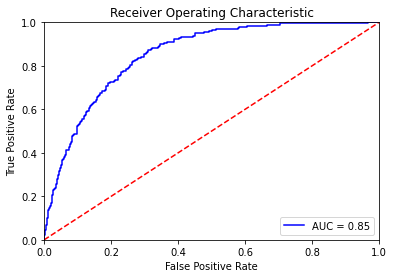

In [80]:
import sklearn.metrics as metrics
p_pred1 = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

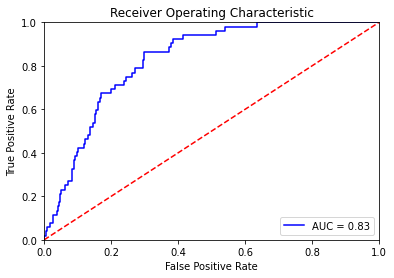

In [81]:
import sklearn.metrics as metrics
p_pred1 = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature: 0, Score: 0.07812
Feature: 1, Score: 0.38653
Feature: 2, Score: 0.18658
Feature: 3, Score: 0.00368
Feature: 4, Score: -0.14961
Feature: 5, Score: -0.17196
Feature: 6, Score: -1.32081
Feature: 7, Score: -0.42681
Feature: 8, Score: -1.28772
Feature: 9, Score: -1.64711
Feature: 10, Score: -0.22309


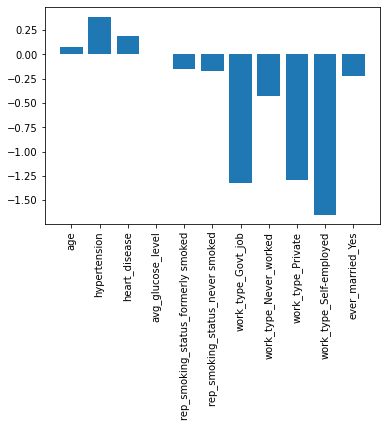

In [82]:
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar(data_f.columns[:-1], importance)
plt.xticks(rotation = 90)
plt.show()

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3)
model_1.fit(x_train,y_train)                               

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [84]:
import sklearn.metrics as metrics
p_pred = model_1.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [85]:
a=[]
for i in threshold:
    p_pred = model_1.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)

In [86]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.07228915662650602

In [87]:
p_pred = model_1.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1226
           1       0.11      0.71      0.19        52

    accuracy                           0.76      1278
   macro avg       0.55      0.74      0.52      1278
weighted avg       0.95      0.76      0.83      1278



In [88]:
import sklearn.metrics as metrics
p_pred = model_1.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [89]:
a=[]
for i in threshold:
    p_pred = model_1.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)

In [90]:
cutoff = threshold[np.argmax(a)]
cutoff

0.1032258064516129

In [91]:
p_pred = model_1.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3635
           1       0.20      0.63      0.30       197

    accuracy                           0.85      3832
   macro avg       0.59      0.74      0.61      3832
weighted avg       0.94      0.85      0.88      3832



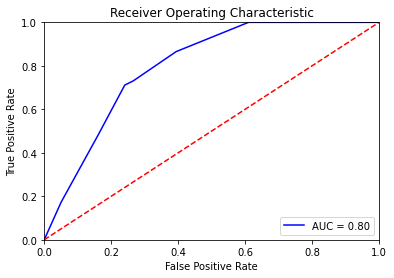

In [92]:
import sklearn.metrics as metrics
p_pred = model_1.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

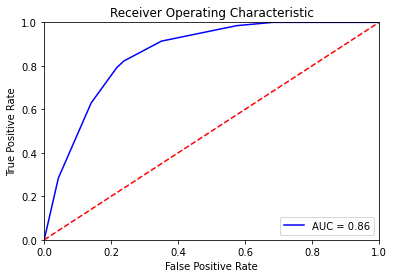

In [93]:
import sklearn.metrics as metrics
p_pred = model_1.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

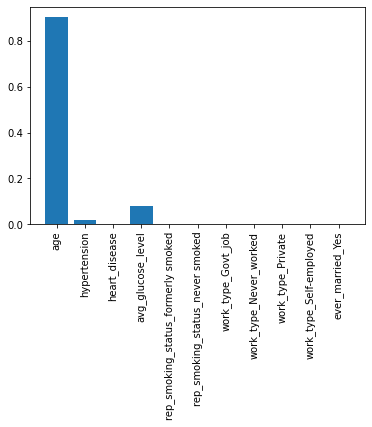

In [94]:
importance1 = model_1.feature_importances_
plt.bar(data_f.columns[:-1], importance1)
plt.xticks(rotation = 90)
plt.show()

### Random forest model

In [95]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,criterion='gini', max_depth= 3)
# fit the regressor with x and y data
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)

In [96]:
import sklearn.metrics as metrics
p_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [97]:
a=[]
for i in threshold:
    p_pred = clf.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)

In [98]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.10338242342992282

In [99]:
# performing predictions on the test dataset
p_pred = model.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
score_ = clf.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1226
           1       0.14      0.62      0.23        52

    accuracy                           0.83      1278
   macro avg       0.56      0.73      0.57      1278
weighted avg       0.95      0.83      0.88      1278



In [100]:
import sklearn.metrics as metrics
p_pred = clf.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [101]:
a=[]
for i in threshold:
    p_pred = clf.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)

In [102]:
cutoff = threshold[np.argmax(a)]
cutoff

0.15036730600212891

In [103]:
p_pred = clf.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
score_ = clf.score(x_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3635
           1       0.29      0.46      0.35       197

    accuracy                           0.91      3832
   macro avg       0.63      0.70      0.65      3832
weighted avg       0.93      0.91      0.92      3832



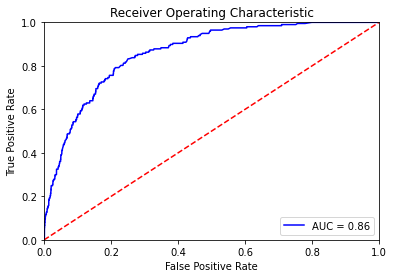

In [104]:
import sklearn.metrics as metrics
p_pred = clf.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

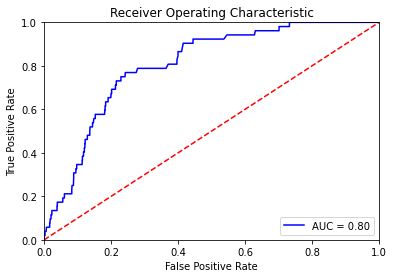

In [105]:
import sklearn.metrics as metrics
p_pred = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
clf.feature_importances_

array([5.55172536e-01, 7.02370314e-02, 6.38773618e-02, 1.68961187e-01,
       3.87664896e-02, 8.96629928e-03, 5.11270095e-03, 6.08433449e-05,
       1.06118728e-02, 1.81226296e-02, 6.01110483e-02])

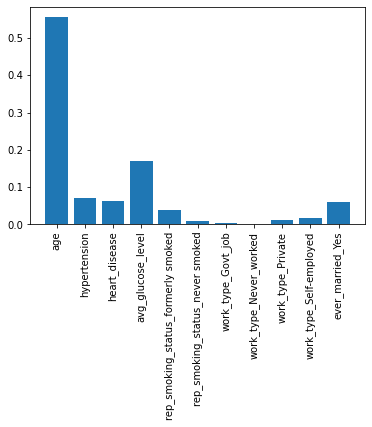

In [107]:
plt.bar(data_f.columns[:-1], clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### Decile cuttoff

In [108]:
from sklearn.model_selection import train_test_split
x = data_f.iloc[:,:-1].values
y = data_f.iloc[:,-1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [109]:
model = LogisticRegression(solver='liblinear', C= 0.1, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=0, solver='liblinear')

In [110]:
p_pred = model.predict_proba(x_train)[:,1]
p_pred

array([0.038274  , 0.07604676, 0.03361378, ..., 0.0165987 , 0.12968238,
       0.0110607 ])

In [111]:
prob=pd.qcut(p_pred,10,labels=False)
len(prob)

3832

In [112]:
dat = pd.DataFrame((np.array([prob, p_pred,y_train])).T, columns=['prob', 'prob_v','stroke'])


In [113]:
dat.groupby('prob').prob_v.min()*100

prob
0.0     0.833374
1.0     1.671423
2.0     2.042662
3.0     2.558784
4.0     3.178505
5.0     3.982073
6.0     5.077959
7.0     6.672048
8.0     8.528284
9.0    12.268381
Name: prob_v, dtype: float64

In [114]:
dat.groupby('prob').prob_v.min().mean()*100

4.681349281992736

In [115]:
dat.groupby('prob').stroke.sum().sum()

186.0

In [116]:
dat.groupby('prob').stroke.sum()/dat.groupby('prob').stroke.sum().sum()*100

prob
0.0     0.000000
1.0     1.612903
2.0     0.000000
3.0     2.688172
4.0     2.688172
5.0     5.376344
6.0     5.913978
7.0    19.354839
8.0    25.268817
9.0    37.096774
Name: stroke, dtype: float64

### Hyperparameter tuning in case of logistic

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(1,2,3,4,5)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(x_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Logistic Regression Parameters: {'C': 5.0}
Best score is 0.9514615622904333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Hyperparameter Tuning in case of Random Forest

In [118]:
params = {'max_depth': list(range(2, 5)),'n_estimators': list(range(10, 30))}

In [119]:
scorer = metrics.make_scorer(metrics.roc_auc_score)

In [120]:
grid = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy"), param_grid=params, scoring=scorer, cv=5)
result = grid.fit(x_train, y_train)

In [121]:
print(f"Best score : {result.best_score_}")
print(f"Best parameter : {result.best_params_}")

Best score : 0.5
Best parameter : {'max_depth': 2, 'n_estimators': 10}


In [122]:
model = RandomForestClassifier(max_depth=result.best_params_["max_depth"], n_estimators=result.best_params_["n_estimators"])
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [123]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [124]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)

In [125]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.10688067517252327

In [126]:
# performing predictions on the test dataset
p_pred = model.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
score_ = model.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1215
           1       0.25      0.43      0.31        63

    accuracy                           0.91      1278
   macro avg       0.61      0.68      0.63      1278
weighted avg       0.93      0.91      0.92      1278



In [127]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [128]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)

In [129]:
cutoff = threshold[np.argmax(a)]
cutoff

0.10417541991366241

In [130]:
p_pred = model.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
score_ = model.score(x_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3646
           1       0.21      0.44      0.28       186

    accuracy                           0.89      3832
   macro avg       0.59      0.68      0.61      3832
weighted avg       0.93      0.89      0.91      3832



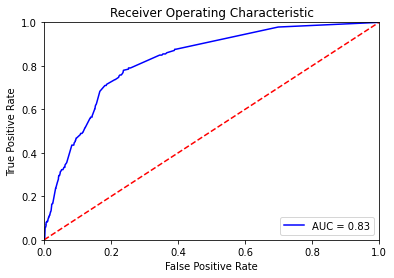

In [131]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

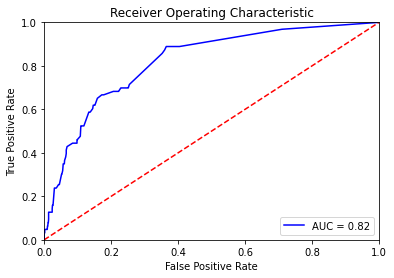

In [132]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
model.feature_importances_

array([0.2962769 , 0.21287407, 0.10416594, 0.1885624 , 0.09661637,
       0.        , 0.        , 0.        , 0.        , 0.00929474,
       0.09220957])

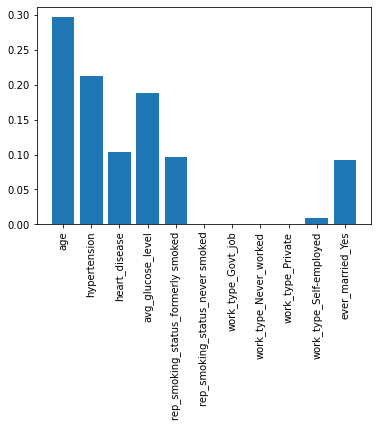

In [134]:
plt.bar(data_f.columns[:-1], model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### Hyperparameter Tuning in case Of Decision Tree

In [135]:
params = {'max_depth': list(range(2, 5)),'min_samples_leaf': list(range(5, 25))}

In [136]:
scorer = metrics.make_scorer(metrics.roc_auc_score)

In [137]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(criterion="entropy"), param_grid=params, scoring=scorer, cv=5)
result = grid.fit(x_train, y_train)

In [138]:
print(f"Best score : {result.best_score_}")
print(f"Best parameter : {result.best_params_}")

Best score : 0.5025657164013329
Best parameter : {'max_depth': 4, 'min_samples_leaf': 5}


In [139]:
model = DecisionTreeClassifier(max_depth=result.best_params_['max_depth'], min_samples_leaf=result.best_params_['min_samples_leaf'],random_state=100)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=100)

In [140]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [141]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)

In [142]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.18181818181818182

In [143]:
p_pred = model.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1215
           1       0.29      0.37      0.33        63

    accuracy                           0.93      1278
   macro avg       0.63      0.66      0.64      1278
weighted avg       0.93      0.93      0.93      1278



In [144]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [145]:
a=[]
for i in threshold:
    p_pred = model.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)

In [146]:
cutoff = threshold[np.argmax(a)]
cutoff

0.13636363636363635

In [147]:
p_pred = model.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3646
           1       0.24      0.44      0.31       186

    accuracy                           0.90      3832
   macro avg       0.60      0.68      0.63      3832
weighted avg       0.93      0.90      0.92      3832



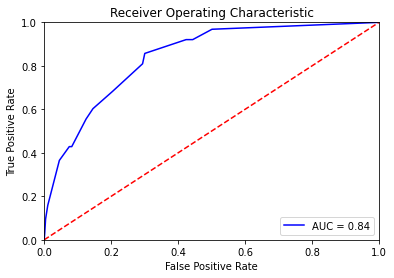

In [148]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

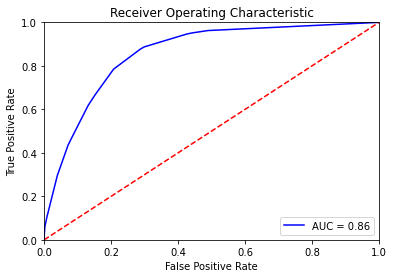

In [149]:
import sklearn.metrics as metrics
p_pred = model.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

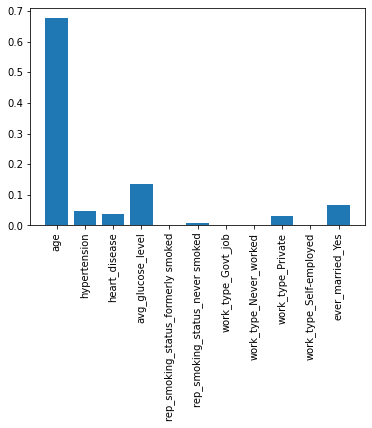

In [150]:
importance1 = model.feature_importances_
plt.bar(data_f.columns[:-1], importance1)
plt.xticks(rotation = 90)
plt.show()

In [151]:
from xgboost import XGBClassifier

In [152]:
XG = XGBClassifier(max_depth=3,n_estimators=10)
XG.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [153]:
import sklearn.metrics as metrics
p_pred = XG.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)

In [154]:
a=[]
for i in threshold:
    p_pred = XG.predict_proba(x_test)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_test,y_pred)
    a.append(f1)

In [155]:
cutoff1 = threshold[np.argmax(a)]
cutoff1

0.1465921

In [156]:
p_pred = XG.predict_proba(x_test)
y_pred = [1 if p[1] >cutoff1 else 0 for p in p_pred]
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1215
           1       0.22      0.60      0.32        63

    accuracy                           0.87      1278
   macro avg       0.60      0.75      0.63      1278
weighted avg       0.94      0.87      0.90      1278



In [157]:
import sklearn.metrics as metrics
p_pred = XG.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)

In [158]:
a=[]
for i in threshold:
    p_pred = XG.predict_proba(x_train)
    y_pred = [1 if p[1] > i else 0 for p in p_pred]
    f1 = f1_score(y_train,y_pred)
    a.append(f1)

In [159]:
cutoff = threshold[np.argmax(a)]
cutoff

0.1904896

In [160]:
p_pred = XG.predict_proba(x_train)
y_pred = [1 if p[1] >cutoff else 0 for p in p_pred]
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3646
           1       0.31      0.42      0.36       186

    accuracy                           0.93      3832
   macro avg       0.64      0.69      0.66      3832
weighted avg       0.94      0.93      0.93      3832



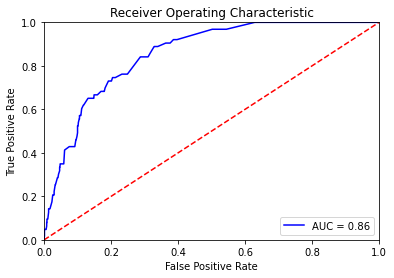

In [161]:
import sklearn.metrics as metrics
p_pred = XG.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

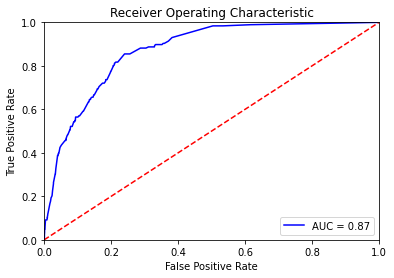

In [162]:
import sklearn.metrics as metrics
p_pred = XG.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, p_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

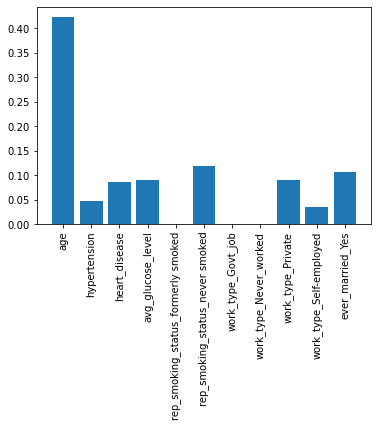

In [163]:
importance1 = XG.feature_importances_
plt.bar(data_f.columns[:-1], importance1)
plt.xticks(rotation = 90)
plt.show()

### Decile Table

In [189]:
from sklearn.model_selection import train_test_split
x = data_f.iloc[:,:-1]
y = data_f.iloc[:,-1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [190]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,ever_married_Yes,stroke
2035,45.0,0,0,73.27,0,0,0,0,1,0,1,0
550,15.0,0,0,126.96,0,1,0,0,0,0,0,0
1547,59.0,0,1,194.98,1,0,0,0,0,1,1,0
4228,68.0,0,0,76.09,0,0,0,0,0,1,1,0
918,77.0,0,0,115.29,1,0,0,0,1,0,1,0


In [191]:
df_train.shape

(3832, 12)

In [192]:
df_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'rep_smoking_status_formerly smoked', 'rep_smoking_status_never smoked',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'ever_married_Yes', 'stroke'],
      dtype='object')

In [193]:
import numpy as np
from sklearn import linear_model

logr = linear_model.LogisticRegression(solver='liblinear', C=4, random_state=0)
logr.fit(x_train, y_train)

LogisticRegression(C=4, random_state=0, solver='liblinear')

In [194]:
y_train_prob = logr.predict_proba(x_train)
y_train_prob

array([[0.98222623, 0.01777377],
       [0.99489585, 0.00510415],
       [0.91749956, 0.08250044],
       ...,
       [0.90999137, 0.09000863],
       [0.99713315, 0.00286685],
       [0.99665176, 0.00334824]])

In [195]:
df_train["prob"]=y_train_prob[:,1]

In [196]:
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,ever_married_Yes,stroke,prob
2035,45.0,0,0,73.27,0,0,0,0,1,0,1,0,0.017774
550,15.0,0,0,126.96,0,1,0,0,0,0,0,0,0.005104
1547,59.0,0,1,194.98,1,0,0,0,0,1,1,0,0.082500
4228,68.0,0,0,76.09,0,0,0,0,0,1,1,0,0.068979
918,77.0,0,0,115.29,1,0,0,0,1,0,1,0,0.188429


In [197]:
df_train.sort_values(by=['prob'], ascending=False, inplace=True)

In [198]:
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,ever_married_Yes,stroke,prob
220,81.0,1,1,250.89,0,0,0,0,1,0,1,1,0.458605
4164,82.0,1,0,222.52,1,0,0,0,1,0,1,0,0.424565
3882,81.0,1,1,217.94,1,0,1,0,0,0,1,0,0.409611
35,82.0,1,1,84.03,1,0,0,0,1,0,0,1,0.399809
337,82.0,0,1,215.60,0,1,0,0,1,0,0,0,0.380134


In [199]:
prob_deciles_train = 9 - pd.qcut(df_train.prob, 10, labels=False)
prob_deciles_train

220     0
4164    0
3882    0
35      0
337     0
       ..
1808    9
3295    9
2898    9
1093    9
4293    9
Name: prob, Length: 3832, dtype: int64

In [200]:
df_train["prob_decile"]=prob_deciles_train

In [201]:
df_train.head()

,age,hypertension,heart_disease,avg_glucose_level,rep_smoking_status_formerly smoked,rep_smoking_status_never smoked,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,ever_married_Yes,stroke,prob,prob_decile
220,81.0,1,1,250.89,0,0,0,0,1,0,1,1,0.458605,0
4164,82.0,1,0,222.52,1,0,0,0,1,0,1,0,0.424565,0
3882,81.0,1,1,217.94,1,0,1,0,0,0,1,0,0.409611,0
35,82.0,1,1,84.03,1,0,0,0,1,0,0,1,0.399809,0
337,82.0,0,1,215.60,0,1,0,0,1,0,0,0,0.380134,0


In [202]:
t1 = pd.crosstab(prob_deciles_train, df_train.stroke)
t1

stroke,0,1
prob,,
0,304,80
1,334,49
2,359,24
3,369,14
4,374,9
5,376,7
6,380,3
7,383,0
8,383,0


In [203]:
# Min prob of stroke
t2 = df_train[['prob', 'prob_decile']].groupby(by='prob_decile').min() * 100
t2

,prob
prob_decile,
0,15.323277
1,7.998708
2,4.758042
3,2.885835
4,1.784265
5,1.110027
6,0.671900
7,0.414231
8,0.279053


In [204]:
# Event covered
t3 = pd.crosstab(prob_deciles_train, df_train.stroke).iloc[:,1] / np.sum(pd.crosstab(prob_deciles_train, df_train.stroke).iloc[:,1]) * 100
t3

prob
0    43.010753
1    26.344086
2    12.903226
3     7.526882
4     4.838710
5     3.763441
6     1.612903
7     0.000000
8     0.000000
9     0.000000
Name: 1, dtype: float64

In [205]:
# Event %
t4 = pd.crosstab(prob_deciles_train, df_train.stroke, normalize='index').iloc[:,1] * 100
t4

prob
0    20.833333
1    12.793734
2     6.266319
3     3.655352
4     2.349869
5     1.827676
6     0.783290
7     0.000000
8     0.000000
9     0.000000
Name: 1, dtype: float64

In [206]:
t5 = t3.cumsum()
t5

prob
0     43.010753
1     69.354839
2     82.258065
3     89.784946
4     94.623656
5     98.387097
6    100.000000
7    100.000000
8    100.000000
9    100.000000
Name: 1, dtype: float64

In [207]:
overall_event_rate = np.sum(t1.iloc[:, 1]) / df_train.shape[0] * 100
overall_event_rate

4.853862212943633

In [208]:
t6 = t4 / overall_event_rate
t6

prob
0    4.292115
1    2.635784
2    1.290996
3    0.753081
4    0.484124
5    0.376541
6    0.161375
7    0.000000
8    0.000000
9    0.000000
Name: 1, dtype: float64

In [209]:
table = pd.DataFrame(data=np.transpose([list(t1.iloc[:,0]), list(t1.iloc[:,1]), list(t2.iloc[:,0]), list(t4), list(t3), list(t5), list(t6)]),
                    columns=['0', '1', 'Min_prob_of_stroke', 'Event_percent', 'Event_covered', 'Cumulative_event_covered', 'Lift'])
table

,0,1,Min_prob_of_stroke,Event_percent,Event_covered,Cumulative_event_covered,Lift
0,304.0,80.0,15.323277,20.833333,43.010753,43.010753,4.292115
1,334.0,49.0,7.998708,12.793734,26.344086,69.354839,2.635784
2,359.0,24.0,4.758042,6.266319,12.903226,82.258065,1.290996
3,369.0,14.0,2.885835,3.655352,7.526882,89.784946,0.753081
4,374.0,9.0,1.784265,2.349869,4.838710,94.623656,0.484124
5,376.0,7.0,1.110027,1.827676,3.763441,98.387097,0.376541
6,380.0,3.0,0.671900,0.783290,1.612903,100.000000,0.161375
7,383.0,0.0,0.414231,0.000000,0.000000,100.000000,0.000000
8,383.0,0.0,0.279053,0.000000,0.000000,100.000000,0.000000
9,384.0,0.0,0.136706,0.000000,0.000000,100.000000,0.000000


### So, we take 0.0475 as the cutoff

In [210]:
cutoff = 0.0475

In [211]:
y_test_prob = logr.predict_proba(x_test)

In [212]:
y_predicted_test = [1 if p[1] > cutoff else 0 for p in y_test_prob]

In [188]:
print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1216
           1       0.12      0.90      0.21        62

    accuracy                           0.67      1278
   macro avg       0.56      0.78      0.50      1278
weighted avg       0.95      0.67      0.76      1278

